### Predictive Customer Churn Analysis for Enhanced Retention Strategies

**Objective:**
The primary objective of this data science project is to develop a predictive model that accurately identifies potential customer churn. By leveraging various customer-centric data sources, the project aims to enhance our understanding of the factors contributing to churn within our user base. The ultimate goal is to empower the business with actionable insights, enabling the implementation of targeted retention strategies to reduce churn rates and increase overall customer satisfaction.

In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [2]:
df = pd.read_csv("churn_prediction.csv")

In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
data_types = df.dtypes
print("Data Types:")
print(data_types)


Data Types:
customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object


In [5]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64


**There are missing values.which are as missing:**

-gender: 525 missing values
-dependents: 2463 missing values
-occupation: 80 missing values
-city: 803 missing values


In [6]:
# Fill in missing values in 'city' with the string 'Unknown'
df['city'].fillna('Unknown', inplace=True)

# Print the updated DataFrame
print(df)


       customer_id  vintage  age  gender  dependents     occupation     city  \
0                1     2101   66    Male         0.0  self_employed    187.0   
1                2     2348   35    Male         0.0  self_employed  Unknown   
2                4     2194   31    Male         0.0       salaried    146.0   
3                5     2329   90     NaN         NaN  self_employed   1020.0   
4                6     1579   42    Male         2.0  self_employed   1494.0   
...            ...      ...  ...     ...         ...            ...      ...   
28377        30297     2325   10  Female         0.0        student   1020.0   
28378        30298     1537   34  Female         0.0  self_employed   1046.0   
28379        30299     2376   47    Male         0.0       salaried   1096.0   
28380        30300     1745   50    Male         3.0  self_employed   1219.0   
28381        30301     1175   18    Male         0.0        student   1232.0   

       customer_nw_category  branch_cod

C:\Users\ntsika\AppData\Local\Temp\ipykernel_8640\3058190601.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['city'].fillna('Unknown', inplace=True)


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the provided data
# Replace 'your_data.csv' with the actual file name or path
df = pd.read_csv("churn_prediction.csv")

# Impute missing values in 'gender' with the mode
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

# Impute missing values in 'dependents' with the median
df['dependents'].fillna(df['dependents'].median(), inplace=True)

# Impute missing values in 'occupation' with the mode
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

# Convert 'city' column to object dtype
df['city'] = df['city'].astype('object')

# Fill in missing values in 'city' with the string 'Unknown'
df['city'].fillna('Unknown', inplace=True)

# Drop duplicate 'current_balance_y' column if it exists
df = df.drop(columns='current_balance_y', errors='ignore')

# Identify categorical and numerical columns
categorical_cols = ['gender', 'occupation', 'city']
numerical_cols = df.columns.difference(categorical_cols + ['churn'])

# Separate features and target variable
X = df.drop(columns=['churn'])
y = df['churn']

# Step 4: Train-Test Split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the DataFrame
print(df.head())


   customer_id  vintage  age gender  dependents     occupation     city  \
0            1     2101   66   Male         0.0  self_employed    187.0   
1            2     2348   35   Male         0.0  self_employed  Unknown   
2            4     2194   31   Male         0.0       salaried    146.0   
3            5     2329   90   Male         0.0  self_employed   1020.0   
4            6     1579   42   Male         2.0  self_employed   1494.0   

   customer_nw_category  branch_code  current_balance  ...  \
0                     2          755          1458.71  ...   
1                     2         3214          5390.37  ...   
2                     2           41          3913.16  ...   
3                     2          582          2291.91  ...   
4                     3          388           927.72  ...   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                        1458.71                         1449.07   
1                        7799.26        

In [8]:
summary_statistics = df.describe()
print("Summary Statistics:")
print(summary_statistics)


Summary Statistics:
        customer_id       vintage           age    dependents  \
count  28382.000000  28382.000000  28382.000000  28382.000000   
mean   15143.508667   2091.144105     48.208336      0.317102   
std     8746.454456    272.676775     17.807163      0.958386   
min        1.000000     73.000000      1.000000      0.000000   
25%     7557.250000   1958.000000     36.000000      0.000000   
50%    15150.500000   2154.000000     46.000000      0.000000   
75%    22706.750000   2292.000000     60.000000      0.000000   
max    30301.000000   2476.000000     90.000000     52.000000   

       customer_nw_category   branch_code  current_balance  \
count          28382.000000  28382.000000     2.838200e+04   
mean               2.225530    925.975019     7.380552e+03   
std                0.660443    937.799129     4.259871e+04   
min                1.000000      1.000000    -5.503960e+03   
25%                2.000000    176.000000     1.784470e+03   
50%                2.0

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

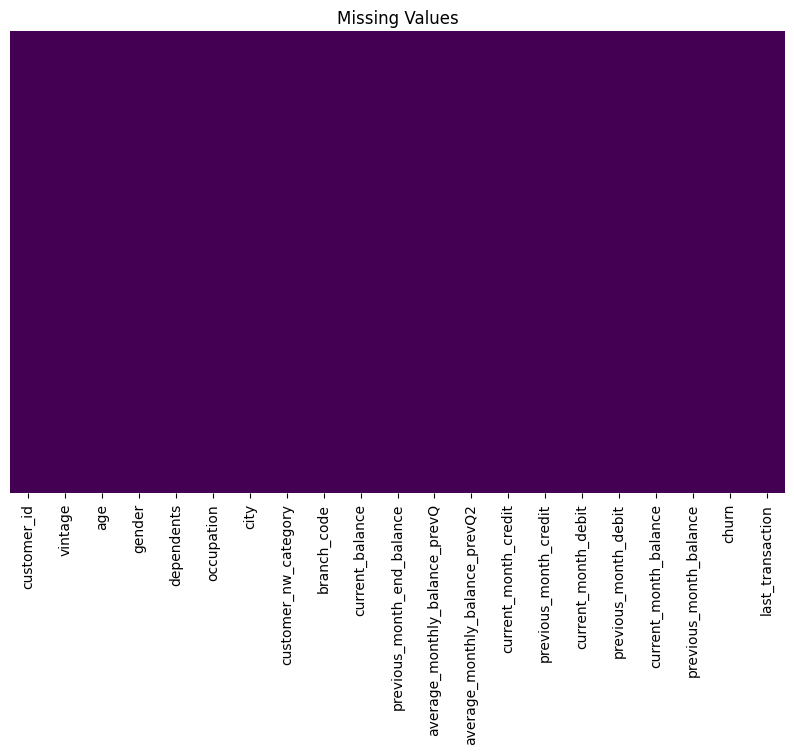

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values')
plt.show()


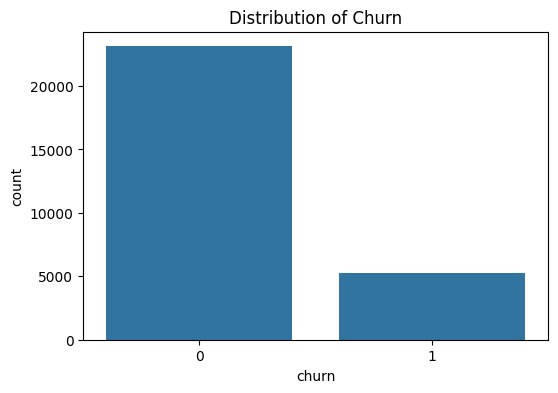

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.show()


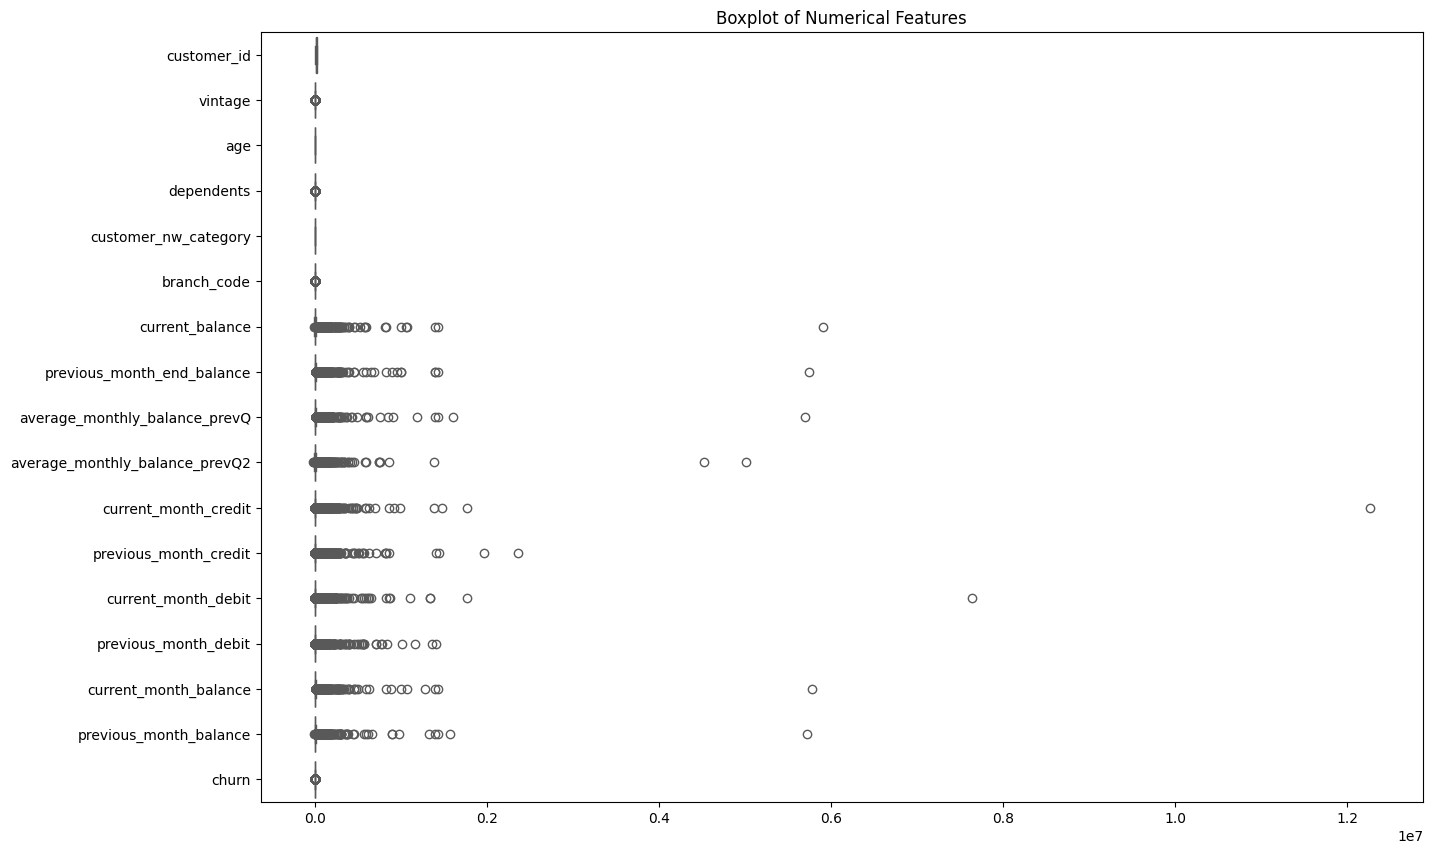

In [12]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_numerical, orient="h", palette="Set2")
plt.title('Boxplot of Numerical Features')
plt.show()


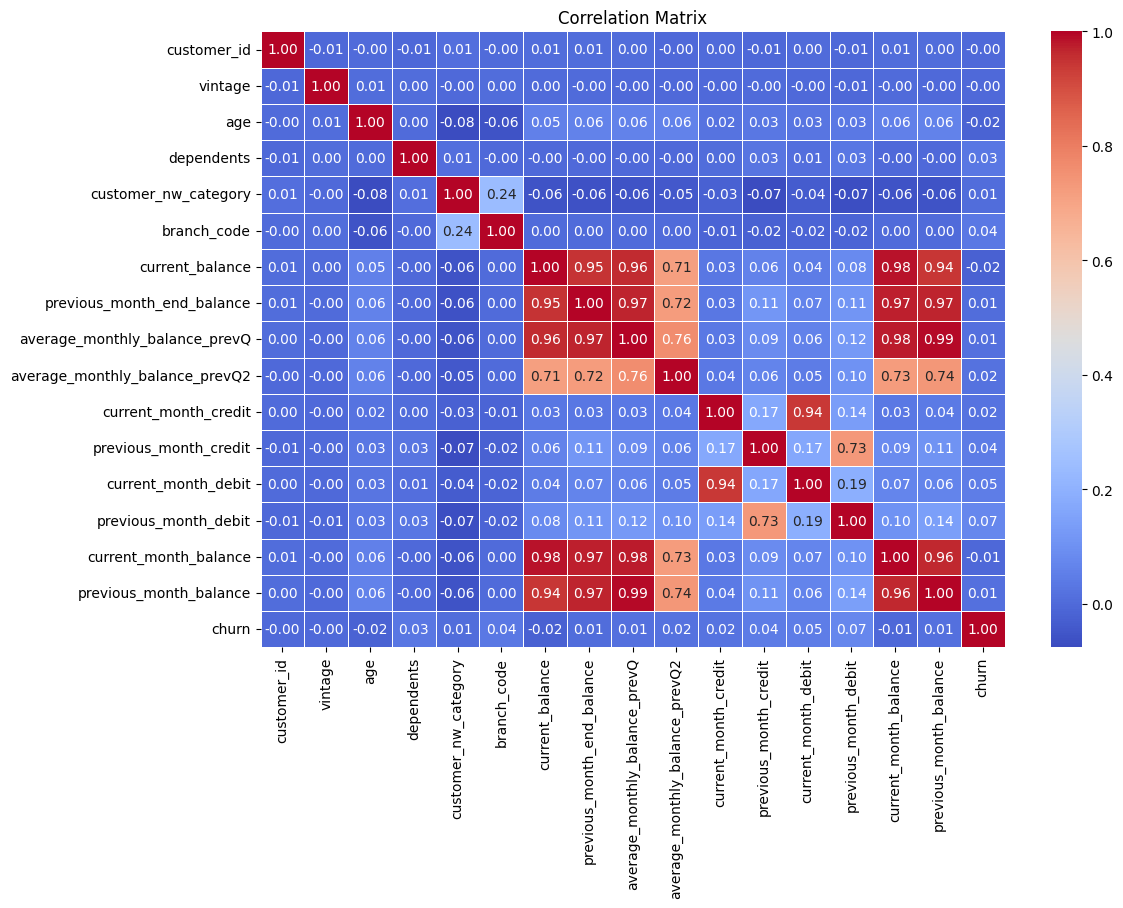

In [13]:
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
df.describe()

,customer_id,vintage,age,dependents,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2091.144105,48.208336,0.317102,2.225530,925.975019,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,272.676775,17.807163,0.958386,0.660443,937.799129,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,73.000000,1.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1958.000000,36.000000,0.000000,2.000000,176.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2154.000000,46.000000,0.000000,2.000000,572.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,2292.000000,60.000000,0.000000,3.000000,1440.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,2476.000000,90.000000,52.000000,3.000000,4782.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


Feature Engineering:



In [15]:
df['current_month_credit_squared'] = df['current_month_credit'] ** 2


In [16]:

df['current_month_credit_squared'] = df['current_month_credit'] ** 2


In [17]:
# Convert 'last_transaction' to datetime format
df['last_transaction'] = pd.to_datetime(df['last_transaction'])

# Extract month and day of the week
df['transaction_month'] = df['last_transaction'].dt.month
df['day_of_week'] = df['last_transaction'].dt.dayofweek


In [18]:
# Assuming 'current_balance' is the column you want to calculate the mean for
customer_mean_transaction = df.groupby('customer_id')['current_balance'].mean().reset_index()

# Merge the mean transaction amount back into the original DataFrame
df = pd.merge(df, customer_mean_transaction, on='customer_id', how='left')

# Rename the new column
df.rename(columns={'current_balance': 'mean_transaction_amount'}, inplace=True)


In [19]:
df['credit_debit_ratio'] = df['current_month_credit'] / df['current_month_debit']
print(df)

       customer_id  vintage  age  gender  dependents     occupation     city  \
0                1     2101   66    Male         0.0  self_employed    187.0   
1                2     2348   35    Male         0.0  self_employed  Unknown   
2                4     2194   31    Male         0.0       salaried    146.0   
3                5     2329   90    Male         0.0  self_employed   1020.0   
4                6     1579   42    Male         2.0  self_employed   1494.0   
...            ...      ...  ...     ...         ...            ...      ...   
28377        30297     2325   10  Female         0.0        student   1020.0   
28378        30298     1537   34  Female         0.0  self_employed   1046.0   
28379        30299     2376   47    Male         0.0       salaried   1096.0   
28380        30300     1745   50    Male         3.0  self_employed   1219.0   
28381        30301     1175   18    Male         0.0        student   1232.0   

       customer_nw_category  branch_cod

Temporal Analysis:

In [20]:
import pandas as pd

# Assuming df is your DataFrame with the provided data
# If 'last_transaction' is not a datetime type, you can convert it to datetime
df['last_transaction'] = pd.to_datetime(df['last_transaction'])

# Extract time-related features
df['year'] = df['last_transaction'].dt.year
df['month'] = df['last_transaction'].dt.month
df['day'] = df['last_transaction'].dt.day
df['day_of_week'] = df['last_transaction'].dt.dayofweek

# Add more temporal features as needed

# Print the updated DataFrame
print(df[['last_transaction', 'year', 'month', 'day', 'day_of_week']])



      last_transaction    year  month   day  day_of_week
0           2019-05-21  2019.0    5.0  21.0          1.0
1           2019-11-01  2019.0   11.0   1.0          4.0
2                  NaT     NaN    NaN   NaN          NaN
3           2019-08-06  2019.0    8.0   6.0          1.0
4           2019-11-03  2019.0   11.0   3.0          6.0
...                ...     ...    ...   ...          ...
28377       2019-10-22  2019.0   10.0  22.0          1.0
28378       2019-12-17  2019.0   12.0  17.0          1.0
28379       2019-12-31  2019.0   12.0  31.0          1.0
28380              NaT     NaN    NaN   NaN          NaN
28381       2019-11-02  2019.0   11.0   2.0          5.0

[28382 rows x 5 columns]


Survival Analysis involves modeling the time until an event of interest occurs, and in this case, the event is customer churn. Here's a basic outline of how you can perform survival analysis using Python with the provided data

In [21]:
!pip install lifelines


<Axes: xlabel='timeline'>

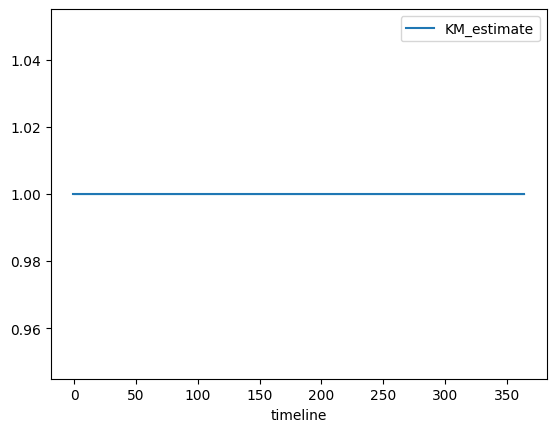

In [22]:
from lifelines import KaplanMeierFitter

# Assuming 'df' is your original DataFrame with 'last_transaction' column
# Replace 'last_transaction' with the actual column name containing transaction dates

# Step 1: Define "time to churn"
df['last_transaction'] = pd.to_datetime(df['last_transaction'])
df['account_opening_date'] = pd.to_datetime('2019-01-01')  # Replace with your actual account opening date

df['time_to_churn'] = (df['last_transaction'] - df['account_opening_date']).dt.days
df['churn_status'] = df['time_to_churn'].apply(lambda x: 1 if x > 365 else 0)  # Define a threshold for churn

# Step 2: Prepare data for survival analysis
survival_data = df[['time_to_churn', 'churn_status']].dropna()

# Step 3: Handle missing values (if any)


kmf = KaplanMeierFitter()
kmf.fit(durations=survival_data['time_to_churn'], event_observed=survival_data['churn_status'])

# Plot the Kaplan-Meier curve
kmf.plot_survival_function()

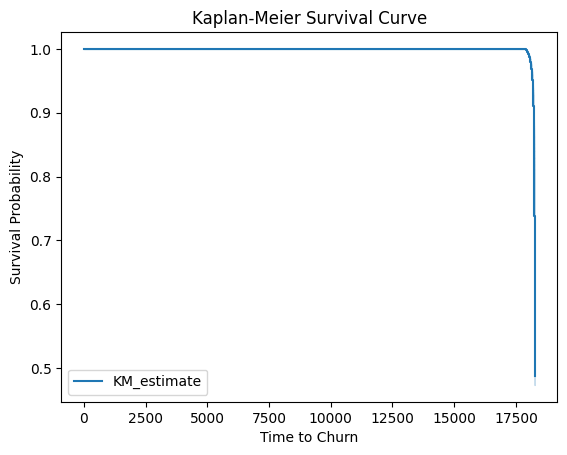

In [23]:

# Create a copy of the DataFrame
df_survival = df.copy()

# Convert 'last_transaction' and 'vintage' to datetime, handle missing values
df_survival['last_transaction'] = pd.to_datetime(df_survival['last_transaction'], errors='coerce')
df_survival['vintage'] = pd.to_datetime(df_survival['vintage'], errors='coerce')

# Drop rows with missing values in 'last_transaction' or 'vintage'
df_survival = df_survival.dropna(subset=['last_transaction', 'vintage'])

# Create a new column 'time_to_churn' representing the time to churn
df_survival['time_to_churn'] = (df_survival['last_transaction'] - df_survival['vintage']).dt.days

# Assuming 'churn' is your target variable
# Create a Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Fit the estimator to the data
kmf.fit(durations=df_survival['time_to_churn'], event_observed=df_survival['churn'])

# Plot the Kaplan-Meier curve
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time to Churn')
plt.ylabel('Survival Probability')
plt.show()


Flat Portion (Upper Horizontal Line): This segment of the curve indicates a period during which a substantial number of customers are not churning. It could be that there's an initial stable period where customers are less likely to churn.

Downward Curve: The decline in the survival probability over time suggests that, after a certain duration, customers start to churn, and the likelihood of churn increases. This could be an indication of a critical point in the customer lifecycle where retention efforts might be less effective.

In [24]:

df_survival = df_survival[['last_transaction', 'vintage', 'dependents', 'occupation', 'city', 'credit_debit_ratio', 'time_to_churn', 'churn']]


In [25]:
df_survival['last_transaction'] = pd.to_datetime(df_survival['last_transaction'], errors='coerce')
df_survival['vintage'] = pd.to_datetime(df_survival['vintage'], errors='coerce')


In [26]:
df_survival = df_survival.dropna(subset=['last_transaction', 'vintage'])


In [27]:
df_survival['time_to_churn'] = (df_survival['last_transaction'] - df_survival['vintage']).dt.days


In [28]:
df_survival['time_to_churn'] = (df_survival['last_transaction'] - df_survival['vintage']).dt.days


In [29]:
kmf = KaplanMeierFitter()


In [30]:
kmf.fit(durations=df_survival['time_to_churn'], event_observed=df_survival['churn'])


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 25159 total observations, 20198 right-censored observations>

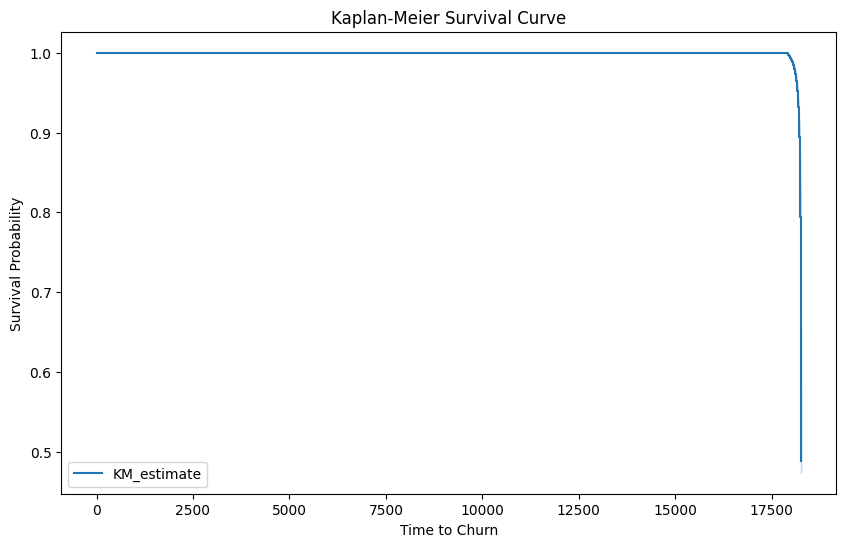

In [31]:
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time to Churn')
plt.ylabel('Survival Probability')
plt.show()

### Compare Survival Curves:

In [32]:
median_survival_time = kmf.median_survival_time_
print(f"Median Survival Time: {median_survival_time} days")


Median Survival Time: 18260.0 days


The median survival time is a measure of central tendency for the time it takes for an event (churn in this case) to occur. In the context of survival analysis, the median survival time represents the point in time by which half of the observed events have occurred.

In your case, the median survival time is 18260.0 days. This means that, based on your data and the groups you are comparing (e.g., different categories in the 'occupation' column), half of the customers have experienced churn within approximately 18260.0 days.

It provides valuable information about the central tendency of the survival time distribution and can be useful for understanding the typical time until churn for the specified groups in your analysis.








### Log-Rank Test

In [33]:
from lifelines.statistics import logrank_test

# Assuming 'occupation' is a categorical column in your DataFrame
unique_occupations = df_survival['occupation'].unique()

# Create two groups for comparison
group1 = unique_occupations[0]
group2 = unique_occupations[1]

# Perform log-rank test
results = logrank_test(
    df_survival[df_survival['occupation'] == group1]['time_to_churn'],
    df_survival[df_survival['occupation'] == group2]['time_to_churn'],
    event_observed_A=df_survival[df_survival['occupation'] == group1]['churn'],
    event_observed_B=df_survival[df_survival['occupation'] == group2]['churn']
)

print(f"Log-Rank Test p-value: {results.p_value}")


Log-Rank Test p-value: 0.00011884732938442835


In [34]:
# Check data types of relevant columns
print(df_survival[['last_transaction', 'vintage']].dtypes)

# Convert 'last_transaction' and 'vintage' to datetime, handle missing values
df_survival['last_transaction'] = pd.to_datetime(df_survival['last_transaction'], errors='coerce')
df_survival['vintage'] = pd.to_datetime(df_survival['vintage'], errors='coerce')

# Drop rows with missing values in 'last_transaction' or 'vintage'
df_survival = df_survival.dropna(subset=['last_transaction', 'vintage'])

# Create a new column 'time_to_churn' representing the time to churn
df_survival['time_to_churn'] = (df_survival['last_transaction'] - df_survival['vintage']).dt.days

# Display the first few rows of the preprocessed DataFrame
df_survival.head()


last_transaction    datetime64[ns]
vintage             datetime64[ns]
dtype: object


,last_transaction,vintage,dependents,occupation,city,credit_debit_ratio,time_to_churn,churn
0,2019-05-21,1970-01-01 00:00:00.000002101,0.0,self_employed,187.0,1.000000,18036,0
1,2019-11-01,1970-01-01 00:00:00.000002348,0.0,self_employed,Unknown,0.000102,18200,0
3,2019-08-06,1970-01-01 00:00:00.000002329,0.0,self_employed,1020.0,1.000000,18113,1
4,2019-11-03,1970-01-01 00:00:00.000001579,2.0,self_employed,1494.0,0.000561,18202,1
5,2019-11-01,1970-01-01 00:00:00.000001923,0.0,self_employed,1096.0,0.000420,18200,0


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [1]:


data = {
    'last_transaction': pd.to_datetime(['2019-05-21', '2019-11-01', '2019-08-06', '2019-11-03', '2019-11-01']),
    'vintage': pd.to_timedelta([2101, 2348, 2329, 1579, 1923], unit='D'),
    'dependents': [0.0, 0.0, 0.0, 2.0, 0.0],
    'occupation': ['self_employed', 'self_employed', 'self_employed', 'self_employed', 'self_employed'],
    'city': [187.0, np.nan, 1020.0, 1494.0, 1096.0],
    'credit_debit_ratio': [1.000000, 0.000102, 1.000000, 0.000561, 0.000420],
    'time_to_churn': [18036, 18200, 18113, 18202, 18200],
    'churn': [0, 0, 1, 1, 0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Fill missing values in the 'city' column (you can use other imputation methods if needed)
df['city'].fillna(df['city'].mean(), inplace=True)

# Convert 'last_transaction' to datetime if it's not already
df['last_transaction'] = pd.to_datetime(df['last_transaction'])

# Extract the numeric columns for training the logistic regression model
numeric_cols = ['dependents', 'city', 'credit_debit_ratio', 'time_to_churn']
X = df[numeric_cols]
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# It's a good practice to scale your data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

